# 당뇨병 건강지표 데이터분석

## 데이터 불러오기


In [1]:
import pandas as pd

# DataFrame 생성
df = pd.read_csv('/content/drive/MyDrive/데이터분석/데이터/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 결과확인
print(df)   # 컬럼이 많아서 한눈에 안들어온다.

       Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                    0       1         0          1   26       0       0   
1                    0       1         1          1   26       1       1   
2                    0       0         0          1   26       0       0   
3                    0       1         1          1   28       1       0   
4                    0       0         0          1   29       1       0   
...                ...     ...       ...        ...  ...     ...     ...   
70687                1       0         1          1   37       0       0   
70688                1       0         1          1   29       1       0   
70689                1       1         1          1   25       0       0   
70690                1       1         1          1   18       0       0   
70691                1       1         1          1   25       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0             

## 데이터 전처리

In [2]:
## 누락 데이터 확인
counts = df.isnull().sum()
print(f'각 컬럼별 누락 데이터의 수 확인 : \n{counts}')

각 컬럼별 누락 데이터의 수 확인 : 
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Gender                  0
Age                     0
Education               0
Income                  0
dtype: int64


In [3]:
### 이상치 --> BMI 한개만
import matplotlib.pyplot as plt

BMI = df.loc[:,'BMI']

<Axes: >

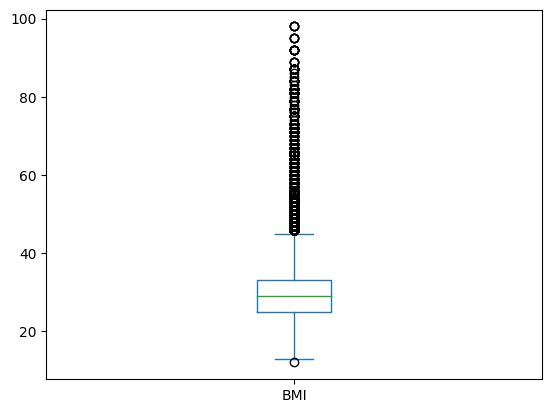

In [4]:
BMI.plot(kind = 'box')
# 여기서는 이상치가 있어도 제거하지 않는다. 이는 이상치가 아닐 수도 있다.
# 환자의 수치는 정상범위를 넘어선다. 그래서 환자인 것임.

In [5]:
### 데이터 프레임에 대한 기본 정보 확인 ---> info() 사용

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

## 데이터 탐색

In [6]:
### 정답 레이블의 분포 확인

# value_counts()

In [7]:
df.loc[:,'Diabetes_binary'].value_counts()
# 일반적으로 일반 환자가 90% 이상, 그러면 학습이 당뇨병아님으로 판단할 확률이 높음. 그래서 이를 50:50으로 맞춘것임
# 이를 undersampling이라고 함.
# 반대로 당뇨병에 해당하는 사람을 늘리는 방법을 oversampling이라고 함.

Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64

## 학습용 데이터와 평가용 데이터 생성

In [8]:
### 전체 데이터 --> 학습용:평가용 = 80:20
from sklearn.model_selection import train_test_split

In [9]:
# X data 생성
X_data = df.drop(columns= ['Diabetes_binary'])

# y data 생성
y_data = df.loc[:,'Diabetes_binary']

print(X_data)
print(y_data)

       HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0           1         0          1   26       0       0                     0   
1           1         1          1   26       1       1                     0   
2           0         0          1   26       0       0                     0   
3           1         1          1   28       1       0                     0   
4           0         0          1   29       1       0                     0   
...       ...       ...        ...  ...     ...     ...                   ...   
70687       0         1          1   37       0       0                     0   
70688       0         1          1   29       1       0                     1   
70689       1         1          1   25       0       0                     1   
70690       1         1          1   18       0       0                     0   
70691       1         1          1   25       0       0                     1   

       PhysActivity  Fruits

In [10]:
# train_test_split() 사용
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y_data)

In [11]:
print(X_train.info())
print('-'*80)
print(X_test.info())
print('-'*80)
print(y_train.info())
print('-'*80)
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56553 entries, 35369 to 27209
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                56553 non-null  int64
 1   HighChol              56553 non-null  int64
 2   CholCheck             56553 non-null  int64
 3   BMI                   56553 non-null  int64
 4   Smoker                56553 non-null  int64
 5   Stroke                56553 non-null  int64
 6   HeartDiseaseorAttack  56553 non-null  int64
 7   PhysActivity          56553 non-null  int64
 8   Fruits                56553 non-null  int64
 9   Veggies               56553 non-null  int64
 10  HvyAlcoholConsump     56553 non-null  int64
 11  AnyHealthcare         56553 non-null  int64
 12  NoDocbcCost           56553 non-null  int64
 13  GenHlth               56553 non-null  int64
 14  MentHlth              56553 non-null  int64
 15  PhysHlth              56553 non-null  int64
 16  DiffW

In [12]:
print(f'X_train 확인 \n{X_train}')
print('-'*80)
print(f'y_train 확인 \n{y_train}')
print('-'*80)
# 데이터의 인덱스 확인
print(f'X_train의 index 확인 : \n{X_train.index}')
print('-'*80)
print(f'y_train의 index 확인 : \n{y_train.index}')
print('-'*80)
# 정답의 항목별 빈도수 확인
counts = y_train.value_counts()
print(f'학습용 데이터의 항목별 빈도수 : \n {counts}')

X_train 확인 
       HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
35369       1         1          1   25       1       0                     1   
40967       1         0          1   25       0       0                     0   
27238       1         0          1   30       0       0                     0   
50582       1         1          1   36       1       0                     0   
38854       1         0          1   30       1       0                     0   
...       ...       ...        ...  ...     ...     ...                   ...   
22335       1         1          1   22       0       0                     1   
7166        1         1          1   29       0       0                     0   
66883       1         0          1   20       1       0                     0   
36604       1         1          1   27       0       0                     0   
27209       0         1          1   29       0       0                     0   

       PhysActi

## DecisionTree 분류모델을 이용한 당뇨병 분류

### 모델 생성

In [13]:
# 필요한 함수 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 함수 호출, 모델 객체 생성
dt = DecisionTreeClassifier()

### 모델 학습

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 모델 학습 시 생성된 의사결정 트리 시각화

In [15]:
# gradcam 이미지 생성에 대한 설명이 가능한...
# decision tree는 whitebox 모델이라 한다. 어떤 기준인지가 투명하게 공개되므로..
# 연구에 인공지능 기술을 이용한다. 누구나.. 근데, 그 근거를 제시해야 한다.
# 이것이 논문의 질을 좌지우지 한다.


In [16]:
## 학습된 모델의 깊이 확인
dt.get_depth()

37

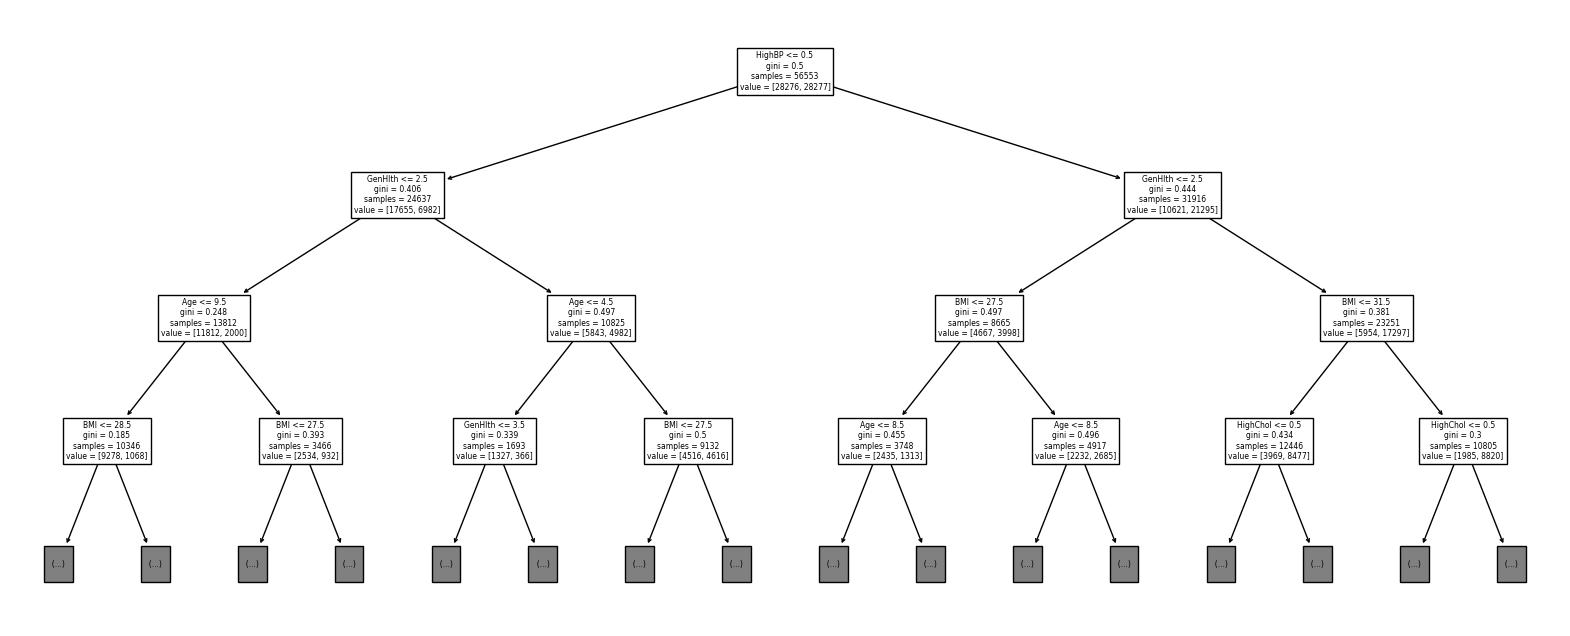

In [17]:
# 이미지의 크기 재설정
plt.figure(figsize = (20, 8))

# 트리구조 시각화
from sklearn.tree import plot_tree
plot_tree(decision_tree = dt, feature_names = X_train.columns, max_depth = 3)
plt.savefig('/content/drive/MyDrive/데이터분석/diabetes.png')
plt.show()

### 학습용/평가용 데이터를 이용한 예측

In [18]:
# 학습용 데이터에 대한 예측
pred_train = dt.predict(X_train)
print(f'학습용 데이터에 대한 예측의 결과 : \n{pred_train}')
print('-'*80)
sum(pred_train == y_train)

학습용 데이터에 대한 예측의 결과 : 
[1 1 0 ... 1 1 0]
--------------------------------------------------------------------------------


56281

In [19]:
# 평가용 데이터에 대한 예측
pred_test = dt.predict(X_test)
print(f'평가용 데이터에 대한 예측의 결과 : \n{pred_test}')
print('-'*80)
sum(pred_test == y_test)

평가용 데이터에 대한 예측의 결과 : 
[0 0 0 ... 1 1 0]
--------------------------------------------------------------------------------


9259

### 모델 평가

In [20]:
# 정확도를 평가하기 위해서 필요한 함수 임포트
from sklearn.metrics import accuracy_score

# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train, pred_train)
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}')
print('-'*80)

# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test, pred_test)
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}')

학습용 데이터에 대한 정확도 : 0.995190352412781
--------------------------------------------------------------------------------
평가용 데이터에 대한 정확도 : 0.6548553645943843


In [21]:
# Decision Tree의 성능이 65% 수준에 불과.
# 성능을 더 끌어올리려면 개선을 해야 한다.
# 성능개선을 한다. 그 방법으로서 모델평가방법부터 개선
# train data   -> test data   그 전에 검증의 과정을 거쳐야 한다.

# k-fold cross-validation(교차검증)을 한다.

### GridSearchCV 를 이용한 모델 최적화 (`24.6.1. 7th 강의)

#### best 모델 생성 (학습용 데이터가 아닌 검증용 데이터 이용)

In [22]:
# GridSearchCV모델 생성에 필요한 함수 임포트
from sklearn.model_selection import GridSearchCV  # 파이썬 함수에서 클래스는 대문자

# 최적화 할 기본 모델
dt = DecisionTreeClassifier(random_state = 0)
params = {'max_depth':[3,4,5,6,7,8,9,10]}

# GridSearchCV함수 호출, 모델 생성
grid_dt = GridSearchCV(
    estimator  = dt,
    param_grid = params,
    scoring    = 'accuracy',
    cv = 10
)

# 학습 및 평가 (이걸 실행하면 속성 변수로 저장)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [23]:
### 최적의 성능일 때의 정확도 확인
print(grid_dt.best_score_)

0.7404380597210916


In [24]:
### 최적의 성능일 때의 하이퍼파라미터 확인
print(grid_dt.best_params_)

{'max_depth': 7}


In [25]:
### best 모델 생성
best_dt = DecisionTreeClassifier(max_depth = 7, random_state = 0)

#### best 모델 학습

In [26]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

#### 평가용 데이터를 이용한 예측

In [27]:
pred = best_dt.predict(X_test)
print(pred)

[1 0 1 ... 1 0 1]


#### best 모델 평가

In [28]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred)

# 최종결과
print(f'평가용 데이터에 대한 정확도 : {accuracy}')

# 이걸 통해서 65%에서 74%까지 끌어올렸음.
# 최적화를 통해도 74%면 이 모델은 못씀.
# 더 성능을 개선하고 싶다면 모델을 바꿔야 한다.

평가용 데이터에 대한 정확도 : 0.7412122498055025


## RandomForest 분류모델을 이용한 당뇨병 분류

### best 모델 생성

In [29]:
# decision tree모델과 달리 바로 best 모델부터 바로..

In [30]:
# 필요한 함수 import

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [32]:
### GridSearchCV 함수 실행

# 최적화 할 대상 모델 생성
rf = RandomForestClassifier(random_state = 0)

# 최적화 할 매개 변수 설정
params = {'n_estimators' : [100,200,300,400],
           'max_depth' : [7,8,9] }

#params = {'n_estimators' : [100,200,300,400,500]}  # 이렇게 한번 해보는 .. 다양한 방법으로 시도 필요

# GridSearchCV 함수호출, 모델 객체 생성
grid_rf = GridSearchCV(
    estimator = rf,
    param_grid = params,
    scoring = 'accuracy',
    cv = 10
)

# 학습 및 평가
grid_rf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
### 최적의 성능 확인
print(grid_rf.best_score_)

### 위에서 100,200,300,400,500까지 해보면 0.740 정도로 나온다.

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_rf.best_params_)

In [33]:
### best 모델 생성
best_rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 9,
    random_state = 0
)

In [34]:
### best 모델 생성
'''
# 탐색의 조건 : n_estimators -> [100,200,300,400,500] 적용
'''
best_rf1 = RandomForestClassifier(
    n_estimators = 400,
    random_state = 0
)

### best 모델 학습

In [ ]:
best_rf.fit(X_train, y_train)

In [35]:
best_rf1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=0)

### 평가용 데이터에 대한 예측

In [ ]:
pred = best_rf.predict(X_test)

In [36]:
pred1 = best_rf1.predict(X_test)

### best 모델 평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 : {accuracy}')


In [37]:
# 필요한 함수 임포트
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy1 = accuracy_score(y_test, pred1)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 : {accuracy1}')

# 근데, 실제로는 accuracy 보다 f1_score를 정확도로 많이 쓴다.
# 시중의 책에는 max_depth는 중요하지 않고, n_estimator의 갯수만 중요하다고 나와 있는 책도 있다.
# 이는 맞지 않다. max_depth도 중요함.
# 그리고 데이터분석도 중요하다. 가령 diabetes와 성명간의 관계 등은 필요가 없다. 이런 데이터를 삭제하는 등.
# 전체 수집된 데이터 중 한 칼럼씩 뺀 후 다시 학습해본다. 이때 성능은 오르거나 떨어지거나 그대로거나 셋중 하나.
# 이때 성능이 떨어지면 그 칼럼은 중요한 칼럼이다.

평가용 데이터에 대한 정확도 : 0.7404342598486456


In [39]:
# binary cross entropy  -> 손실함수도 참고해볼 것. 잠깐 언급만 하고 넘어감.



## LightGBM 분류 모델을 이용한 당뇨병 분류

### best 모델 생성

In [54]:
### GridSearchCV 함수 사용

# 필요한 함수 import
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 최적화할 기본 모델 생성
lgbm = LGBMClassifier(random_state=0,
                      bagging_seed=0,
                      feature_fraction_seed=0,
                      data_random_seed=0,
                      drop_seed=0,
                      verbose=-1)
## verbose 는 무슨 여러가지 문자들이 막 뜨는데 그걸 안뜨게 하는 역할
## 위 설정은 template처럼 lgbm 할때 쓰면 됨.

# 최적화 할 매개변수 설정
# params = {'learning_rate': [0.01, 0.05,0.1,0.2,0.3],     # 약 5분 걸림
#           'n_estimators' : [30,50,100,200,300]}

# 깊이 설정, accuracy를 올리기 위해서..
params = {'learning_rate': [0.01,0.05,0.1,0.2,0.3],   # 약 13분 걸림
          'n_estimators' : [30,50,100,200,300],
          'max_depth':[5,7,9]}

# GridSearchCV 함수호출, 모델 객체 생성
grid_lgbm = GridSearchCV(
    estimator = lgbm,
    param_grid = params,
    scoring = 'accuracy',
    cv = 10
)

## 위 학습의 횟수는 5*5*10 = 250번

# 학습 및 평가
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LGBMClassifier(bagging_seed=0, data_random_seed=0,
                                      drop_seed=0, feature_fraction_seed=0,
                                      random_state=0, verbose=-1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [30, 50, 100, 200, 300]},
             scoring='accuracy')

In [55]:
### 최적의 성능 확인
print(grid_lgbm.best_score_)

0.7531872258843921


In [56]:
### 최적의 성능 확인
print(grid_lgbm.best_score_)

0.7531872258843921


In [57]:
## 최적의 성능을 나타내는 하이퍼파라미터 조합 확인
print(grid_lgbm.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [62]:
### best 모델 생성
best_lgbm = LGBMClassifier(
    learning_rate = 0.1,
    n_estimators = 100,
    random_state=0,
    bagging_seed=0,
    feature_fraction_seed=0,
    data_random_seed=0,
    drop_seed=0,
    verbose=-1
)

### best 모델 학습

In [63]:
best_lgbm.fit(X_train, y_train)

LGBMClassifier(bagging_seed=0, data_random_seed=0, drop_seed=0,
               feature_fraction_seed=0, random_state=0, verbose=-1)

### 평가용 데이터에 대한 예측

In [64]:
pred_lgbm = best_lgbm.predict(X_test)

### best 모델 평가

In [65]:
# 필요한 함수 임포트
from sklearn.metrics import accuracy_score   # metrics는 평가함수를 모아놨다.

# 평가용 데이터를 이용한 정확도 평가
accuracy2 = accuracy_score(y_test, pred_lgbm)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 : {accuracy2}')

# accuracy2 는 0.7535 수준, 아직 낮음. 그래서 깊이를 조작해본다.
# 그 결과 0.7540 까지 나옴.

평가용 데이터에 대한 정확도 : 0.7540137209137846
